In [1]:
pip install albumentations opencv-python-headless


Note: you may need to restart the kernel to use updated packages.


In [2]:
import zipfile
import os

# Path ke file ZIP
zip_file_path = "dataset dami 12.zip"  

# Path untuk ekstraksi
extract_to_path = "extracted_data_folder" 
os.makedirs(extract_to_path, exist_ok=True) 

# Ekstraksi file ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Dataset berhasil diekstrak ke: {extract_to_path}")


Dataset berhasil diekstrak ke: extracted_data_folder


In [3]:
dataset_path = "extracted_data_folder/dataset"


In [6]:
import os

# Path dataset
dataset_path = "extracted_data_folder/dataset"

# Periksa kategori
categories = os.listdir(dataset_path)
print(f"Kategori yang ditemukan: {categories}")

# Hitung jumlah file di setiap kategori
for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        num_files = len(os.listdir(category_path))
        print(f"Kategori '{category}' memiliki {num_files} file.")


Kategori yang ditemukan: ['test_black', 'test_color', 'train_black', 'train_color']
Kategori 'test_black' memiliki 7 file.
Kategori 'test_color' memiliki 7 file.
Kategori 'train_black' memiliki 57 file.
Kategori 'train_color' memiliki 57 file.


In [11]:
from PIL import Image

dimensions = []
formats = []
file_sizes = []

# Looping melalui setiap kategori
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                dimensions.append(img.size)  # (width, height)
                formats.append(img.format)  # Format gambar
                file_sizes.append(os.path.getsize(img_path))  # Ukuran file dalam bytes
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")

# Statistik dimensi
unique_dimensions = set(dimensions)
print(f"Dimensi gambar unik: {unique_dimensions}")

# Statistik format gambar
unique_formats = set(formats)
print(f"Format gambar unik: {unique_formats}")

# Statistik ukuran file
avg_file_size = sum(file_sizes) / len(file_sizes) if file_sizes else 0
print(f"Rata-rata ukuran file: {avg_file_size / 1024:.2f} KB")


Dimensi gambar unik: {(1440, 3600)}
Format gambar unik: {'PNG'}
Rata-rata ukuran file: 872.18 KB


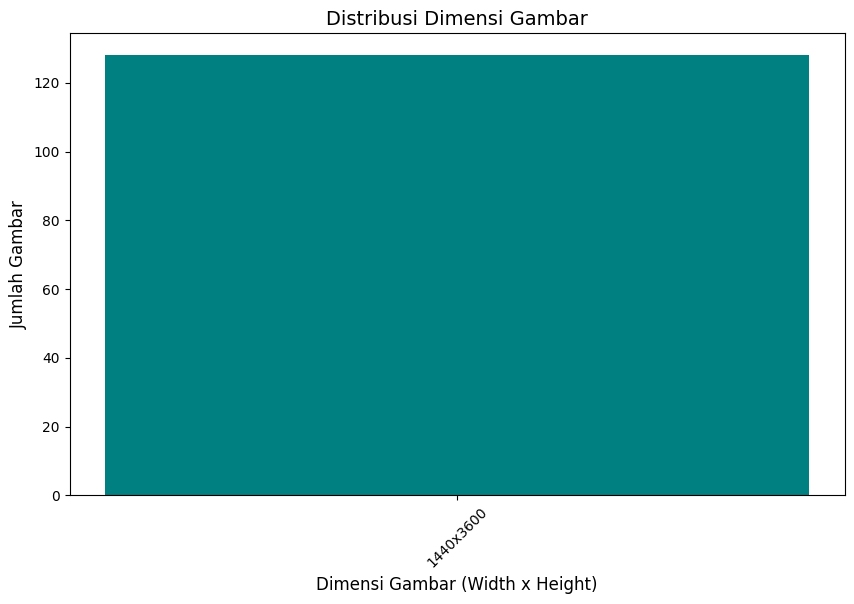

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# Distribusi dimensi
dimension_counts = Counter(dimensions)

# Plot
plt.figure(figsize=(10, 6))
plt.bar([f"{dim[0]}x{dim[1]}" for dim in dimension_counts.keys()], dimension_counts.values(), color='teal')
plt.title("Distribusi Dimensi Gambar", fontsize=14)
plt.xlabel("Dimensi Gambar (Width x Height)", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=45)
plt.show()


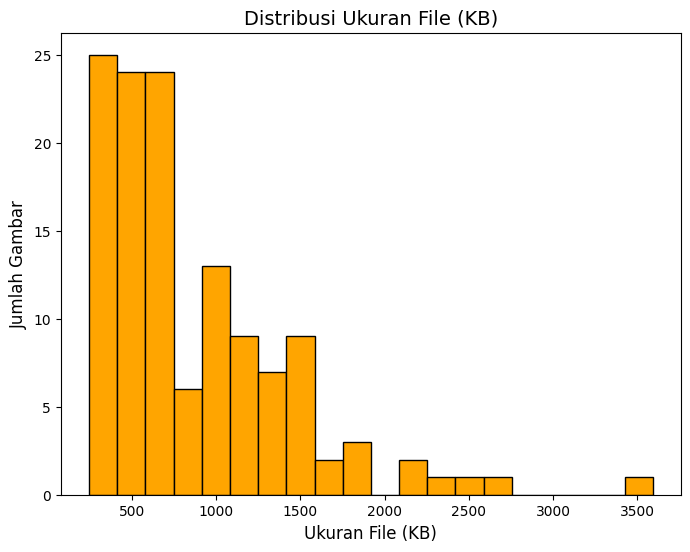

In [13]:
import numpy as np

# Histogram ukuran file
plt.figure(figsize=(8, 6))
plt.hist([size / 1024 for size in file_sizes], bins=20, color='orange', edgecolor='black')
plt.title("Distribusi Ukuran File (KB)", fontsize=14)
plt.xlabel("Ukuran File (KB)", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.show()


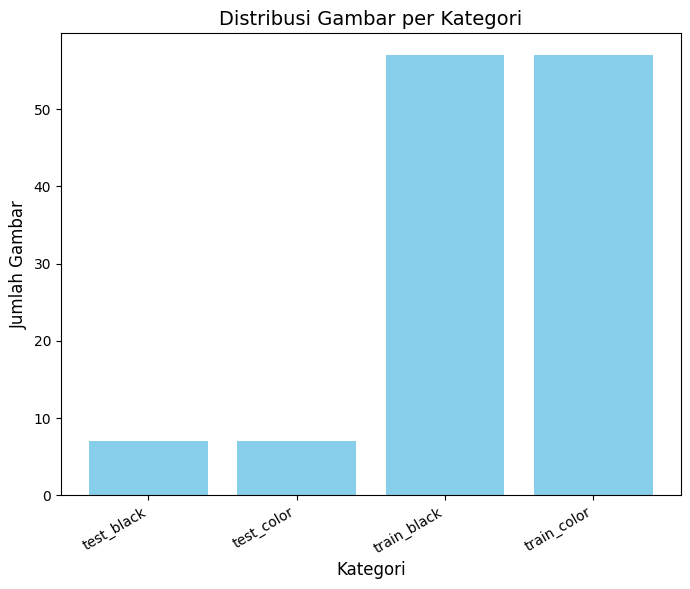

In [14]:
# Data distribusi kategori
class_counts = {cat: len(os.listdir(os.path.join(dataset_path, cat))) for cat in categories}

# Plot distribusi
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title("Distribusi Gambar per Kategori", fontsize=14)
plt.xlabel("Kategori", fontsize=12)
plt.ylabel("Jumlah Gambar", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.show()


In [16]:
import numpy as np

# Total jumlah gambar
total_images = sum(class_counts.values())  # Hitung total jumlah gambar dari class_counts

# Standar deviasi jumlah gambar
std_dev = np.std(list(class_counts.values()))  # Standar deviasi dari jumlah gambar per kategori
print(f"Total gambar: {total_images}")
print(f"Standar deviasi distribusi: {std_dev:.2f}")

# Analisis keseimbangan
threshold = 0.1 * (total_images / len(class_counts))  # 10% dari rata-rata jumlah gambar per kategori
if std_dev > threshold:
    print("Dataset kemungkinan tidak seimbang.")
else:
    print("Dataset kemungkinan cukup seimbang.")


Total gambar: 128
Standar deviasi distribusi: 25.00
Dataset kemungkinan tidak seimbang.


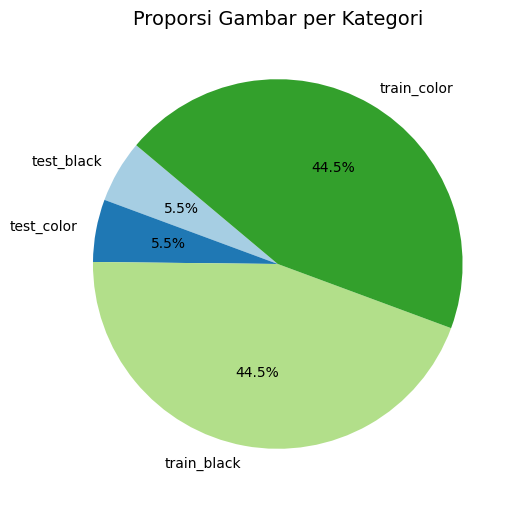

In [17]:
# Diagram lingkaran
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Proporsi Gambar per Kategori", fontsize=14)
plt.show()


In [18]:
import numpy as np

# Memeriksa tipe data piksel
for category in categories:
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        try:
            with Image.open(img_path) as img:
                img_array = np.array(img)  # Konversi ke array numpy
                print(f"File: {img_name}")
                print(f"  - Array shape: {img_array.shape}")  # Dimensi array
                print(f"  - Data type: {img_array.dtype}")  # Tipe data (uint8, float32, dll.)
                break  # Periksa hanya satu file per kategori
        except Exception as e:
            print(f"Error membaca file: {img_path}, {e}")


File: gray_Harungguan_Michael_003.png
  - Array shape: (3600, 1440)
  - Data type: uint8
File: Harungguan_Michael_003.png
  - Array shape: (3600, 1440, 3)
  - Data type: uint8
File: gray_Harungguan Biru_Ruth Theresia_001.png
  - Array shape: (3600, 1440)
  - Data type: uint8
File: Harungguan Biru_Ruth Theresia_001.png
  - Array shape: (3600, 1440, 3)
  - Data type: uint8


In [8]:
from PIL import Image

dimensions = []
formats = []


for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                with Image.open(img_path) as img:
                    dimensions.append(img.size)  # (width, height)
                    formats.append(img.format)  
            except Exception as e:
                print(f"Error membaca file: {img_path}, {e}")


print(f"Dimensi gambar unik: {set(dimensions)}")
print(f"Format gambar unik: {set(formats)}")


Dimensi gambar unik: {(1440, 3600)}
Format gambar unik: {'PNG'}


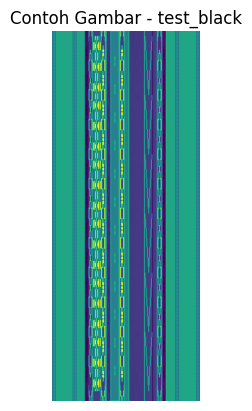

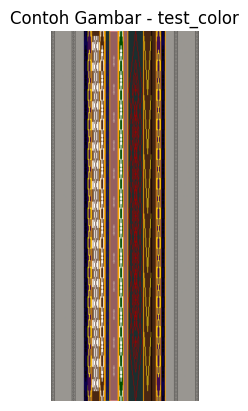

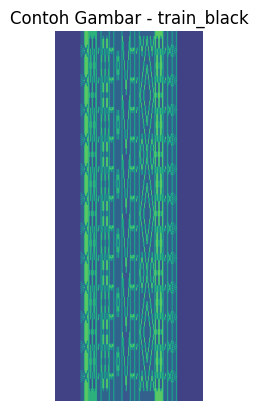

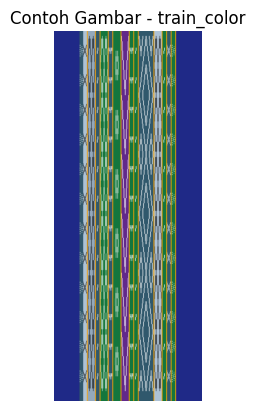

In [9]:
import matplotlib.pyplot as plt
import numpy as np

for category in categories:
    category_path = os.path.join(dataset_path, category)
    if os.path.isdir(category_path):
        sample_image_path = os.path.join(category_path, os.listdir(category_path)[0])
        with Image.open(sample_image_path) as img:
            plt.figure()
            plt.imshow(np.array(img))
            plt.title(f"Contoh Gambar - {category}")
            plt.axis('off')
            plt.show()
